In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Conv1D, Flatten, Dense

In [19]:
# dataset = pd.read_csv('data/data-tc.csv')
# X = pd.read_csv('data/data-tc.csv', usecols=['Complexity', 'Time', 'Cost'])
dataset = pd.read_csv('data/kmeans/data-preprocess.csv')
X = pd.read_csv('data/kmeans/data-preprocess.csv', usecols=['Complexity', 'Time', 'Cost'])

In [20]:
X_train = pd.read_csv('data/kmeans/data-train.csv')
X_test = pd.read_csv('data/kmeans/data-test.csv')
y_train = X_train['Class']
y_test = X_test['Class']

In [21]:
X_train.drop(['Class'], axis=1, inplace=True)
X_test.drop(['Class'], axis=1, inplace=True)

In [22]:
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

accuracy = model.evaluate(X_test, y_test)
print("Accuracy: ", accuracy)

predictions = model.predict(X_test)
y_pred = [1 if x > 0.5 else 0 for x in predictions]

Epoch 1/10


83/83 [==============================] - 2s 7ms/step - loss: -1.1593 - accuracy: 0.3336 - val_loss: -3.3380 - val_accuracy: 0.2976
Epoch 2/10
83/83 [==============================] - 0s 4ms/step - loss: -4.2360 - accuracy: 0.3188 - val_loss: -7.3704 - val_accuracy: 0.3580
Epoch 3/10
83/83 [==============================] - 0s 4ms/step - loss: -7.4918 - accuracy: 0.3725 - val_loss: -10.8007 - val_accuracy: 0.3474
Epoch 4/10
83/83 [==============================] - 0s 4ms/step - loss: -10.0589 - accuracy: 0.4104 - val_loss: -13.6226 - val_accuracy: 0.3505
Epoch 5/10
83/83 [==============================] - 0s 4ms/step - loss: -12.4111 - accuracy: 0.4247 - val_loss: -16.3118 - val_accuracy: 0.3640
Epoch 6/10
83/83 [==============================] - 0s 4ms/step - loss: -14.6409 - accuracy: 0.4361 - val_loss: -18.7923 - val_accuracy: 0.4653
Epoch 7/10
83/83 [==============================] - 0s 4ms/step - loss: -16.6211 - accuracy: 0.4584 - val_loss: -21.3580 - val_accuracy: 0.3565
Epoch 8/

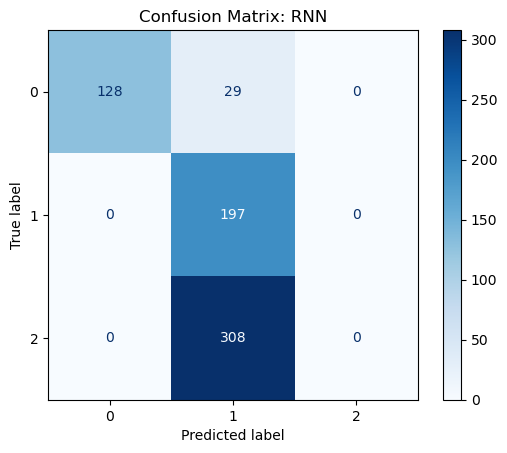

In [24]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix: RNN")
plt.show()

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       157
           1       0.37      1.00      0.54       197
           2       0.00      0.00      0.00       308

    accuracy                           0.49       662
   macro avg       0.46      0.61      0.48       662
weighted avg       0.35      0.49      0.37       662



c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
